In [58]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys 
import statsmodels as sm
import statsmodels.api as smapi
import statsmodels.regression.linear_model as lm
from sklearn.model_selection import train_test_split
sys.path.append(os.path.abspath("/Users/housemex408/Documents/Git-Projects/PRAXIS/iROIEstimator/scripts"))
import Utilities as utils
import Constants as c
%matplotlib inline

In [53]:
project_name = "angular"
directoryPath = "../../exports"
bugs = "{directoryPath}/{project_name}/{project_name}_dataset_BUG.csv".format(directoryPath=directoryPath, project_name=project_name)

cc_columns = [c.VERSION, c.DATE, c.NT_CC, c.NO_CC, c.MODULE_CC, c.LINE_CC, c.T_MODULE, c.T_CC]
df = pd.read_csv(bugs, usecols = cc_columns)
df[c.DATE] = pd.to_datetime(df[c.DATE])
df.head()

,Version,Date,T_Module,NT_CC,NO_CC,Module_CC,Line_CC,T_CC
0,starting,2015-03-23,565.0,14.0,72.0,21.0,213.0,5.0
1,2.0.0-alpha.14,2015-03-23,570.0,5.0,30.0,13.0,190.0,2.0
2,2.0.0-alpha.15,2015-03-24,571.0,1.0,10.0,2.0,71.0,1.0
3,2.0.0-alpha.16,2015-03-26,577.0,3.0,26.0,8.0,130.0,2.0
4,2.0.0-alpha.17,2015-03-27,580.0,1.0,19.0,1.0,5.0,1.0


In [54]:
# df.describe()
# say_hello()
df.dtypes

Version              object
Date         datetime64[ns]
T_Module            float64
NT_CC               float64
NO_CC               float64
Module_CC           float64
Line_CC             float64
T_CC                float64
dtype: object

In [55]:
# print out a correlation matrix of our data frame
corr = df.corr()

# display it
display(corr)

,T_Module,NT_CC,NO_CC,Module_CC,Line_CC,T_CC
T_Module,1.000000,0.330150,0.378968,0.274809,0.338145,-0.074578
NT_CC,0.330150,1.000000,0.914693,0.797218,0.884715,0.537878
NO_CC,0.378968,0.914693,1.000000,0.688748,0.833090,0.474900
Module_CC,0.274809,0.797218,0.688748,1.000000,0.929930,0.386832
Line_CC,0.338145,0.884715,0.833090,0.929930,1.000000,0.400709
T_CC,-0.074578,0.537878,0.474900,0.386832,0.400709,1.000000


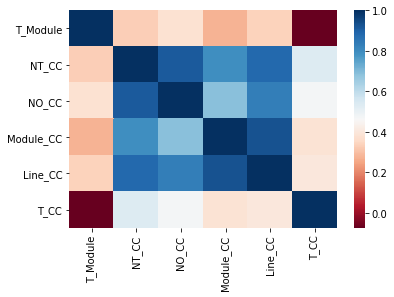

In [56]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

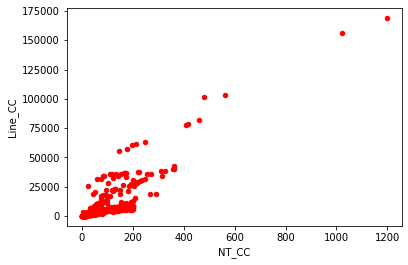

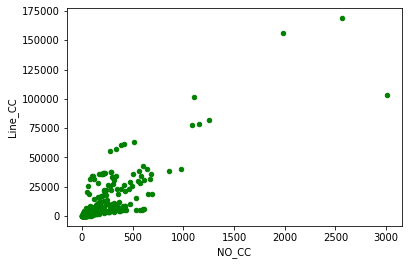

In [59]:
df.plot.scatter(x=c.NT_CC, y=c.LINE_CC, c='red')
df.plot.scatter(x=c.NO_CC, y=c.LINE_CC, c='green')

In [57]:
# Let's create multiple regression
X = df[[c.NT_CC, c.NO_CC]]
Y = df[c.NO_CC]
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=0)
model = lm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
 
print_model = model.summary()
print(print_model)
# Interpreting Restuls:  https://www.youtube.com/watch?v=U7D1h5bbpcs  

MissingDataError: exog contains inf or nans

In [8]:
data = {c.OBSERVED:y_test, c.PREDICTED:predictions.round(2), c.DIFFERENCE:abs(y_test - predictions).round(2), c.PERCENT_ERROR:(abs(y_test - predictions)/y_test).round(2)}
results = pd.DataFrame(data) 
results[c.Version] = np.arange(results.__len__())
results

,Observed,Predicted,Difference,Percent Error,Version
26,917908,683660.63,234247.37,0.26,0
27,884124,684995.58,199128.42,0.23,1
48,6939726,6769340.37,170385.63,0.02,2
22,1106263,821470.94,284792.06,0.26,3
30,1023147,779938.71,243208.29,0.24,4
51,1054074,755227.15,298846.85,0.28,5
7,380262,387243.57,6981.57,0.02,6
59,732239,767185.62,34946.62,0.05,7
34,872212,754256.39,117955.61,0.14,8


In [9]:
pred25 = calculate_PRED(0.25, results)
print("PRED (25): " + "{:.2%}".format(pred25))

pred50 = calculate_PRED(0.50, results)
print("PRED (50): " + "{:.2%}".format(pred50))

PRED (25): 66.67%
PRED (50): 100.00%


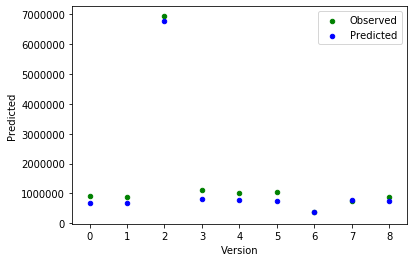

In [10]:
ax = results.plot(kind='scatter', x=c.VERSION, y=c.Observed, c='green', label=c.Observed)
results.plot(kind='scatter', x=c.VERSION, y=c.PREDICTED, c='blue', label=c.PREDICTED, ax=ax)

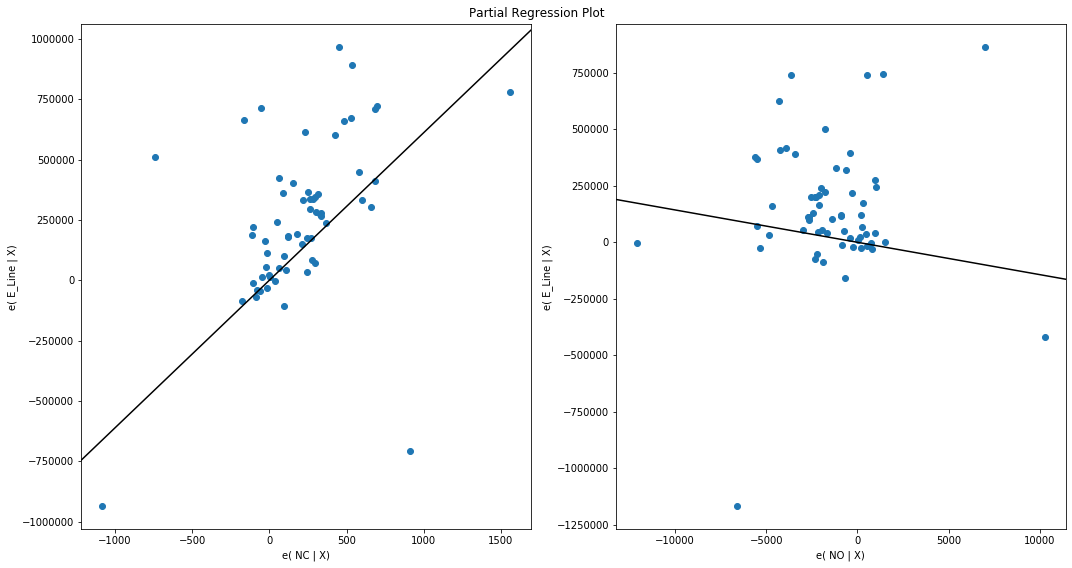

In [11]:
partialRegPlot = plt.figure(figsize=(15,8))
partialRegPlot = sm.graphics.regressionplots.plot_partregress_grid(model, fig=partialRegPlot)

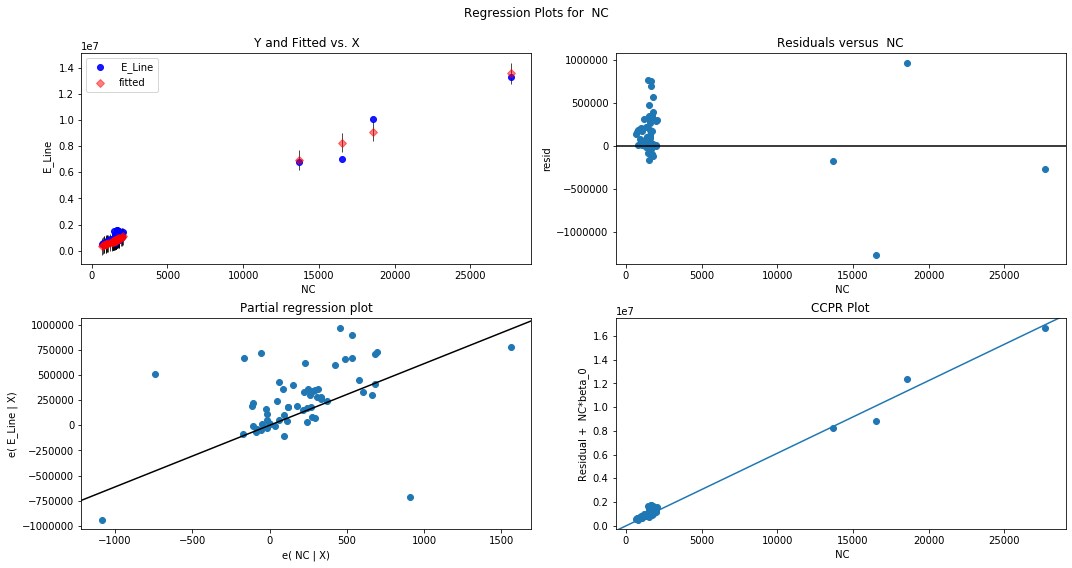

In [12]:
regPlotNC = plt.figure(figsize=(15,8))
regPlotNC = sm.graphics.regressionplots.plot_regress_exog(model, c.NT_CC, fig=regPlotNC)

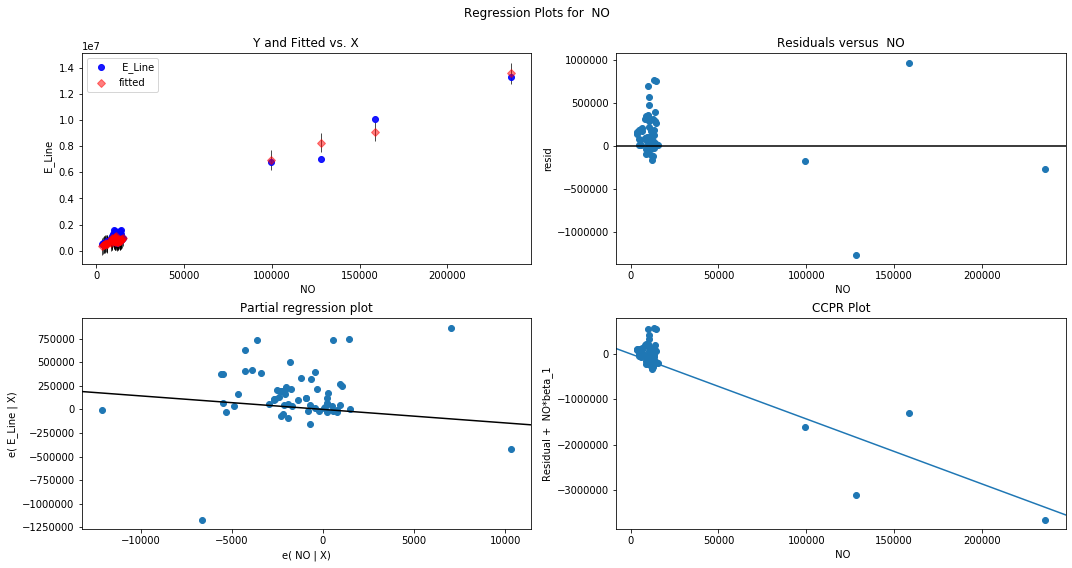

In [13]:
regPlotNO = plt.figure(figsize=(15,8))
regPlotNO = sm.graphics.regressionplots.plot_regress_exog(model, c.NO_CC, fig=regPlotNO)

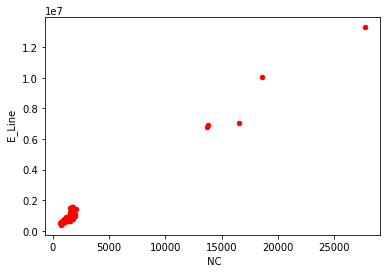

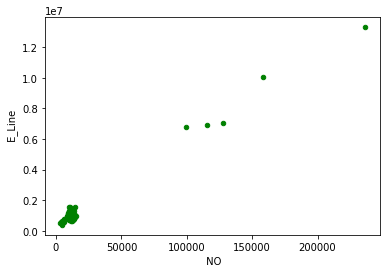

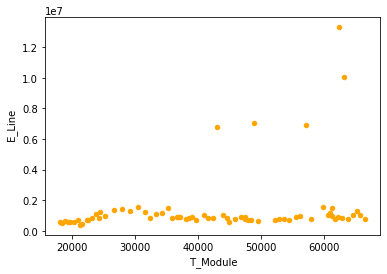

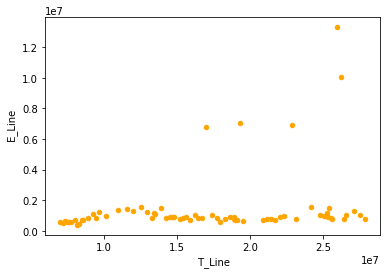

In [14]:
df.plot.scatter(x=' NC', y=' E_Line', c='red')
df.plot.scatter(x=' NO', y=' E_Line', c='green')
df.plot.scatter(x=' T_Module', y=' E_Line', c='orange')
df.plot.scatter(x=' T_Line', y=' E_Line', c='orange')

In [15]:
# Let's create multiple regression
X = df[[' NC', ' NO', ' T_Module']]
Y = df[' E_Module']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.876, test_size=0.124, random_state=0)
model = lm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
 
print_model = model.summary()
print(print_model)

OLS Regression Results                                
Dep. Variable:               E_Module   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              506.9
Date:                Sun, 29 Mar 2020   Prob (F-statistic):                    4.65e-42
Time:                        22:09:07   Log-Likelihood:                         -587.38
No. Observations:                  62   AIC:                                      1181.
Df Residuals:                      59   BIC:                                      1187.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [16]:
data = {'Observed':y_test, 'Predicted':predictions.round(2), 'Difference':abs(y_test - predictions).round(2), 'Percent Error':(abs(y_test - predictions)/y_test).round(2)}
results = pd.DataFrame(data) 
results['Version'] = np.arange(results.__len__())
results

,Observed,Predicted,Difference,Percent Error,Version
26,10645,9305.17,1339.83,0.13,0
27,7949,9380.46,1431.46,0.18,1
48,37904,36215.73,1688.27,0.04,2
22,8869,9385.66,516.66,0.06,3
30,9641,11037.02,1396.02,0.14,4
51,10795,13782.00,2987.00,0.28,5
7,5868,5416.70,451.30,0.08,6
59,10076,12338.24,2262.24,0.22,7
34,10812,11266.31,454.31,0.04,8


In [17]:
pred25 = calculate_PRED(0.25, results)
print("PRED (25): " + "{:.2%}".format(pred25))

pred50 = calculate_PRED(0.50, results)
print("PRED (50): " + "{:.2%}".format(pred50))

PRED (25): 88.89%
PRED (50): 100.00%


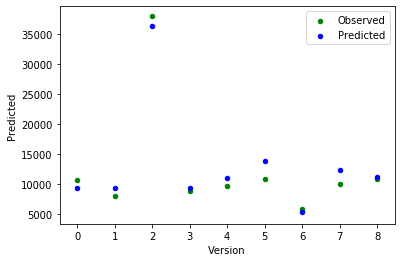

In [18]:
ax = results.plot(kind='scatter', x='Version', y='Observed', c='green', label='Observed')
results.plot(kind='scatter', x='Version', y='Predicted', c='blue', label='Predicted', ax=ax)

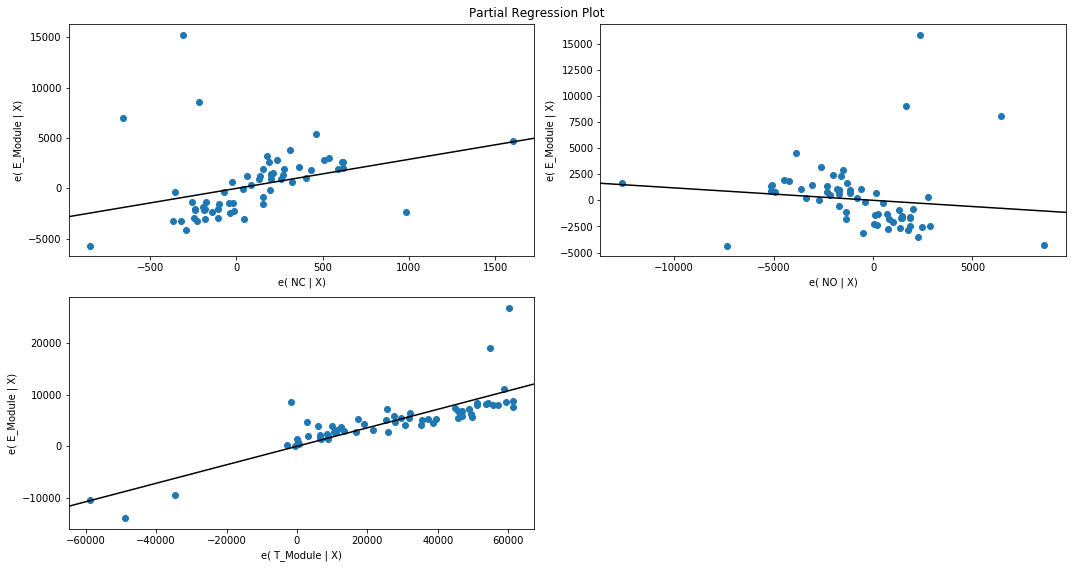

In [19]:
partialRegPlot = plt.figure(figsize=(15,8))
partialRegPlot = sm.graphics.regressionplots.plot_partregress_grid(model, fig=partialRegPlot)

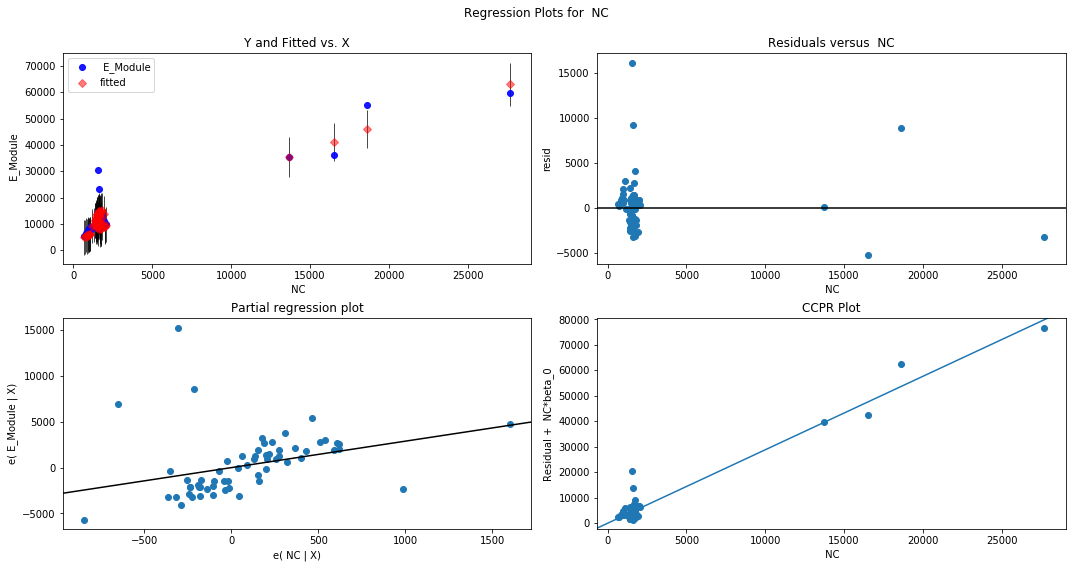

In [20]:
regPlotNC = plt.figure(figsize=(15,8))
regPlotNC = sm.graphics.regressionplots.plot_regress_exog(model, " NC", fig=regPlotNC)

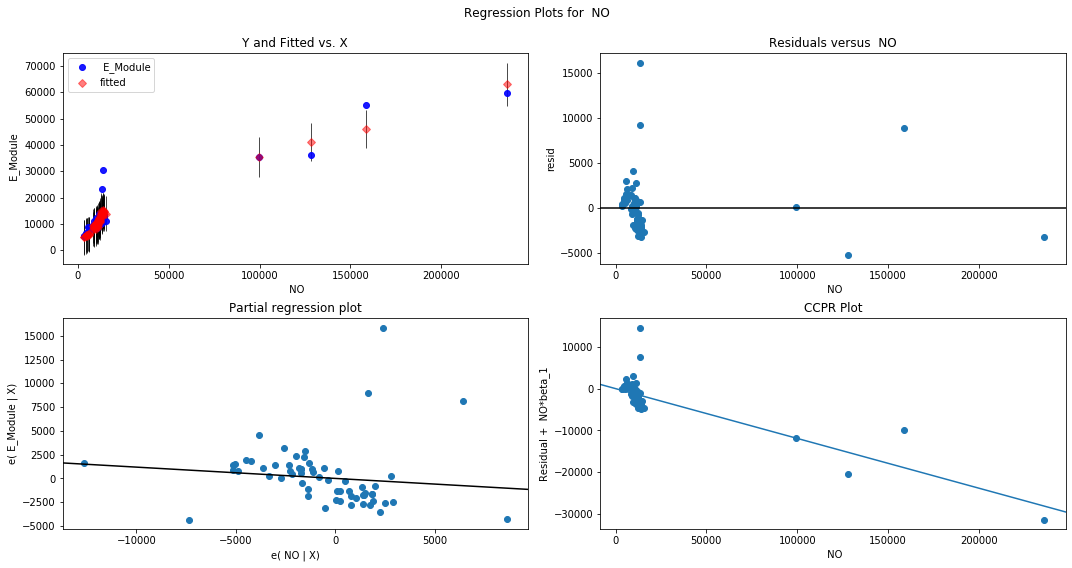

In [21]:
regPlotNO = plt.figure(figsize=(15,8))
regPlotNO = sm.graphics.regressionplots.plot_regress_exog(model, " NO", fig=regPlotNO)